# Function calling LLM's

## General purpose LLMs 
- Respond to all types of queries including function calling 
    - OpenAI GPT-x
    - Gemini 
    - Mistral 
    - etc 

## Special Purpose LLMs
- Highly trained to focus on a single or small set of tasks 
    - Raven-13B
        - Tuned to provide function calling services 
        - Will always try to return a function 
        - Smaller and lower latency than general purpose LLMs

# Function Calling, Tools? 

- "Function Calling" is the name given to this LLM capability of forming a string containing a function call or structure needed to make a function call 
- 'Tools' are the functions being called.

### A Local Python Tool

In [1]:
from matplotlib import pyplot as plt

def plot_some_points(x: list, y: list):
    """
    Plots some points!
    :param x: 
    :param y: 
    """
    plt.plot(x, y)
    plt.show()

In [2]:
USER_QUERY = "Hey can you plot y=10x where x=1, 2, 3 for me?"

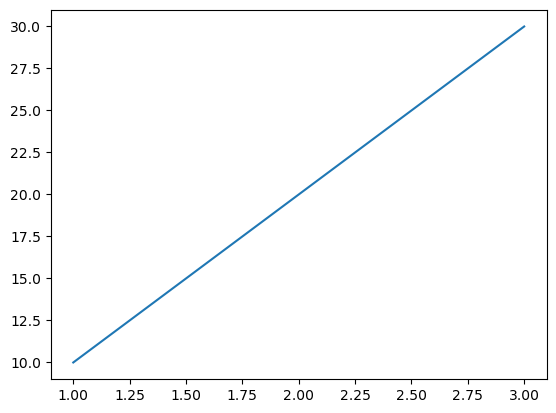

In [3]:
plot_some_points(x=[1, 2, 3], y=[10, 20, 30])

In [5]:
prompt = \
f'''
def plot_some_points(x: list, y: list):
    """
    Plots some points!
    :param x: 
    :param y: 
    """
    plt.plot(x, y)
    plt.show()
User Query: {USER_QUERY}<human_end>
'''

In [6]:
from utils import query_raven
function_call = query_raven(prompt)

In [7]:
print(function_call)

plot_some_points(x=[1, 2, 3], y=[10, 20, 30])


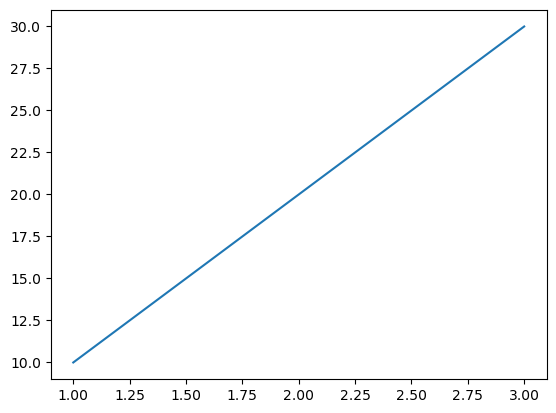

In [8]:
exec (function_call)

## Function description 
- Name of the tool, indicating what it does 
- Information to be extracted from user input 
- When to call the function
## LLM 
- LLM must have been trained to recognize function calls

### Let's Try Another Example!

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_clown_face(face_color='yellow', eye_color='black', 
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized. 
    """
    # Constants
    face_radius = 0.4
    nose_radius = 0.1
    nose_x, nose_y = 0.5, 0.5
    mouth_x, mouth_y = 0.5, 0.3
    mouth_color = 'black'
    eye_size = 0.05
    mouth_size = (0.3, 0.1)
    eye_offset=(0.15, 0.15)
    mouth_theta = (200, 340)

    fig, ax = plt.subplots()
    # Face
    face = patches.Circle((0.5, 0.5), face_radius, color=face_color, fill=True)
    ax.add_patch(face)
    # Eyes
    eye_left = patches.Circle((0.5-eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    eye_right = patches.Circle((0.5+eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    ax.add_patch(eye_left)
    ax.add_patch(eye_right)
    # Nose
    nose = patches.Circle((nose_x, nose_y), nose_radius, color=nose_color, fill=True)
    ax.add_patch(nose)
    # Mouth
    mouth = patches.Arc((mouth_x, mouth_y), mouth_size[0], mouth_size[1], angle=0, 
                        theta1=mouth_theta[0], theta2=mouth_theta[1], color=mouth_color, linewidth=2)
    ax.add_patch(mouth)
    # Setting aspect ratio to 'equal' to ensure the face is circular
    ax.set_aspect('equal')
    # Remove axes
    ax.axis('off')
    plt.show()

#### Let's Define A Prompt

In [10]:
USER_QUERY = \
"Hey can you draw a pink clown face with a red nose" 

raven_prompt = \
'''
Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: {query}<human_end>
'''
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)

In [11]:
print (raven_prompt_with_query)


Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: Hey can you draw a pink clown face with a red nose<human_end>



In [12]:

from utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)

draw_clown_face(face_color='pink', nose_color='red')


#### Let's Run The Call

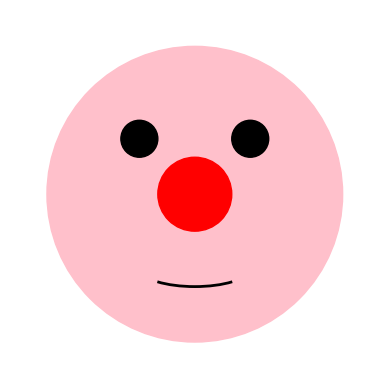

In [13]:

exec(raven_call)